This script is pre-process data where we have done the following things :
    > removing columns Unnamed and From based on relevance
    > replacing 'day' with 'days' in date for better processing
    > replacing date with numerical date values
    > removing rows if column 'job_description' value is Null
    > seperating list of skills into seperate rows for simplicity

This script is also to perform eda where we have done the following things :
    > Bar Graph for Per Day count of Jobs added
    > Seperating list of skills into seperate rows for simplicity
    > Bar graph of top 10 skills
    > Line graph for top 10 job titles
    > bar graph for top 10 job titles
    > Scatter-plot for Top 10 Jobs VS Job Location
    > Heatmap for correlation between feature columns
    > Graph for top 20 skills with maximum average salary
    > Graph for top 20 skills with minimum average salary


In [38]:
#import files
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [39]:
#importing data
data = pd.read_csv("/Users/parthxparab/Documents/Fall 2019/BIA660/Project/new/job_careerbuilder_new.csv") 
data.head()

,Unnamed: 0,from,date,job_title,job_company,job_location,skills,salary,job_description
0,2,Careerbuilder,Today,Senior Software Developer,Kforce Technology,"Houston, TX","['Advanced Audio Coding (Aac)', 'C Sharp (Prog...","\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
1,6,Careerbuilder,1 day ago,Software Engineer,"TEKsystems, Inc","Charlotte, NC","['Prototype (Computer Science)', 'Java Script ...","\n$111,771.00 (Careerbuilder est.)\n\n\n\nWhat...",At least 5-6 years of software engineering exp...
2,7,Careerbuilder,20 days ago,SOFTWARE ENGINEERING PROGRAM COORDINATOR,Keiser University,Pembroke Pines,"['Coordinating', 'Reports', 'Recording', 'Leve...","\n$128,382.00 (Careerbuilder est.)\n\n\n\nWhat...",Coordinating with Program Directors to maintai...
3,10,Careerbuilder,12 days ago,SOFTWARE ENGINEER JAVA C++,Kelly IT Resources,"Sterling Heights, MI","['Software Design', 'Test Planning', 'Integrat...","\n$122,685.00 (Careerbuilder est.)\n\n\n\nWhat...","Bachelor’s degree in Computer Science , Engine..."
4,11,Careerbuilder,Today,Software Engineer,Kforce Technology,"Washington, DC","['C++ (Programming Language)', 'C (Programming...",\nCompetitive\n,Five to eight years of experience with a Bach...


In [40]:
#removing columns Unnamed and From based on relevance
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['from'])
data.shape

(6583, 7)

In [41]:
#replacing 'day' with 'days' in date for better processing
data1 = data["date"].replace(to_replace ="1 day ago", 
value = "1 days ago")
data["date"] = data1
data.date[124]

'1 days ago'

In [42]:
#replacing date with numerical date values
for i in range(len(data)):
    if(data.date[i] == "Today"):
        data1 = data["date"].replace(to_replace ="Today", 
        value = datetime.datetime.now().strftime("%x"))
        data["date"] = data1
        
    elif((data.date[i][-1]) == 'o' and data.date[i] != "30+ days ago"):
        today = datetime.datetime.now()
        daysAgo = int((data.date[i]).split(' days ago')[0])
        DD = datetime.timedelta(days= daysAgo)
        earlier = today - DD
        earlier_str = earlier.strftime("%x")
        data1 = data["date"].replace(to_replace = data.date[i],         
        value = earlier_str)
        data["date"] = data1

data.head()

,date,job_title,job_company,job_location,skills,salary,job_description
0,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX","['Advanced Audio Coding (Aac)', 'C Sharp (Prog...","\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
1,12/04/19,Software Engineer,"TEKsystems, Inc","Charlotte, NC","['Prototype (Computer Science)', 'Java Script ...","\n$111,771.00 (Careerbuilder est.)\n\n\n\nWhat...",At least 5-6 years of software engineering exp...
2,11/15/19,SOFTWARE ENGINEERING PROGRAM COORDINATOR,Keiser University,Pembroke Pines,"['Coordinating', 'Reports', 'Recording', 'Leve...","\n$128,382.00 (Careerbuilder est.)\n\n\n\nWhat...",Coordinating with Program Directors to maintai...
3,11/23/19,SOFTWARE ENGINEER JAVA C++,Kelly IT Resources,"Sterling Heights, MI","['Software Design', 'Test Planning', 'Integrat...","\n$122,685.00 (Careerbuilder est.)\n\n\n\nWhat...","Bachelor’s degree in Computer Science , Engine..."
4,12/05/19,Software Engineer,Kforce Technology,"Washington, DC","['C++ (Programming Language)', 'C (Programming...",\nCompetitive\n,Five to eight years of experience with a Bach...


In [43]:
#removing rows if column 'job_description' value is Null
data = data[pd.notnull(data['job_description'])]
#data.head()

In [29]:
#seperating list of skills into seperate rows for simplicity
dataTest = data.copy()
x = dataTest["skills"].apply(lambda s: list(ast.literal_eval(s)))
dataTest["skills"] = x
lst_col = 'skills'
dataTest.skills.apply(pd.Series)
dataTest = pd.DataFrame({
        col:np.repeat(dataTest[col].values, dataTest[lst_col].str.len())
       for col in dataTest.columns.difference([lst_col])
   }).assign(**{lst_col:np.concatenate(dataTest[lst_col].values)})[dataTest.columns.tolist()]
#data1 = dataTest[['date','job_title','job_company','skills','job_location']]

In [36]:
dataTest.head()

,date,job_title,job_company,job_location,skills,salary,job_description
0,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",Advanced Audio Coding (Aac),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
1,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",C Sharp (Programming Language),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
2,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",C++ (Programming Language),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
3,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",Software Development Life Cycle,"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
4,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",.Net Framework,"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."


In [10]:
#saving dataframe to csv after complete pre-processing 
dataTest.to_csv(r'/Users/parthxparab/Documents/Fall 2019/BIA660/Project/new/pre_processed_data.csv')


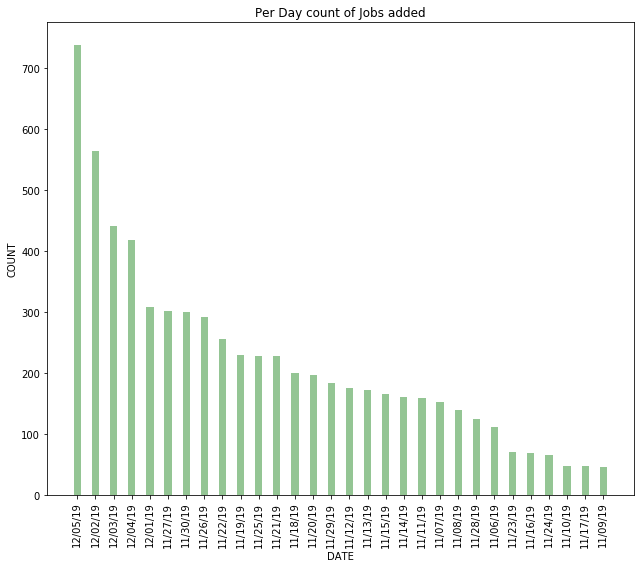

In [11]:
#Bar Graph for Per Day count of Jobs added
dateList= []
for i in range(len(data["date"])):
    dateList.append(data["date"].iloc[i] )
dict0 = {i:dateList.count(i) for i in dateList}
sorted_date = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
word = [] 
frequency = []

for i in range(len(sorted_date)): 
    word.append(sorted_date[i][0]) 
    frequency.append(sorted_date[i][1])
    
indices = np.arange(len(sorted_date)) 
plt.figure(figsize=(9,8)) 
plt.bar(indices, frequency, color='#94c594',width=0.4) 
plt.title('Per Day count of Jobs added') 
plt.xlabel('DATE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='vertical') 
plt.tight_layout() 
plt.show()

In [12]:
#seperating list of skills into seperate rows for simplicity
dataTest = data
x = dataTest["skills"].apply(lambda s: list(ast.literal_eval(s)))
dataTest["skills"] = x
lst_col = 'skills'
dataTest.skills.apply(pd.Series)
dataTest = pd.DataFrame({
        col:np.repeat(dataTest[col].values, dataTest[lst_col].str.len())
       for col in dataTest.columns.difference([lst_col])
   }).assign(**{lst_col:np.concatenate(dataTest[lst_col].values)})[dataTest.columns.tolist()]
data1 = dataTest[['date','job_title','job_company','skills','job_location']]

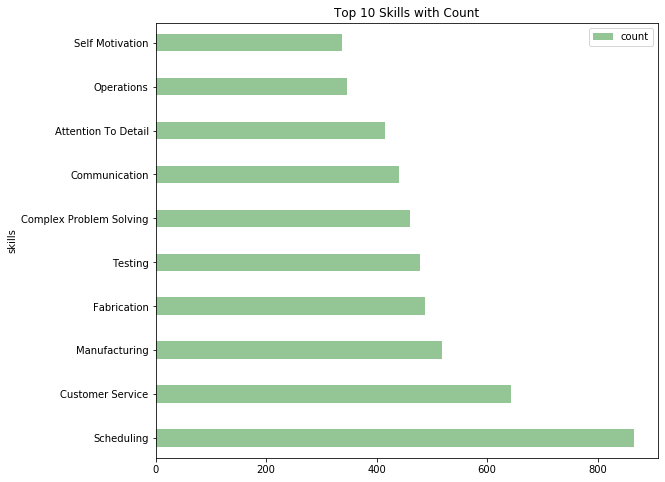

In [13]:
#bar graph of top 10 skills
skillList= []
for i in range(len(data1["skills"])):
    skillList.append(data1["skills"].iloc[i] )
dict0 = {i:skillList.count(i) for i in skillList}
sorted_skill = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_skills = pd.DataFrame(sorted_skill[:10], columns=['skills', 'count'])
ax = df_skills.plot.barh(x='skills', y='count',figsize=(9,8),width=0.4,color='#94c594', title = "Top 10 Skills with Count")

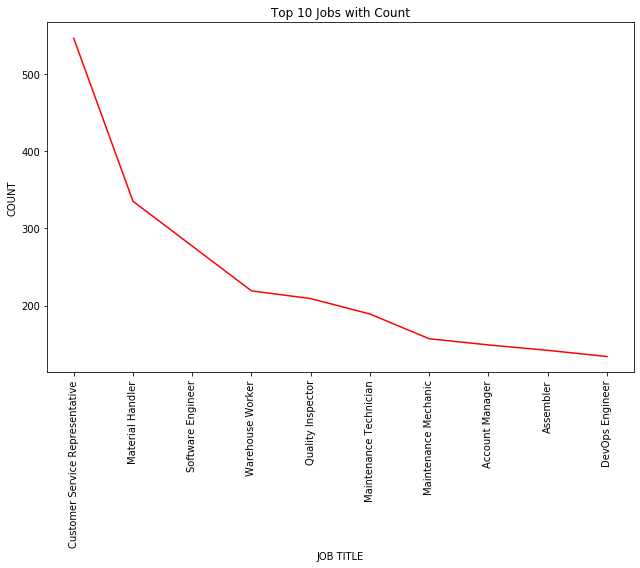

In [14]:
#Line graph for top 10 job titles
titleList= []
for i in range(len(data1["job_title"])):
    titleList.append(data1["job_title"].iloc[i] )
dict0 = {i:titleList.count(i) for i in titleList}
sorted_title = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
word = [] 
frequency = []

for i in range(len(sorted_title[:10])): 
    word.append(sorted_title[i][0]) 
    frequency.append(sorted_title[i][1])
    
indices = np.arange(len(sorted_title[:10])) 
plt.figure(figsize=(9,8)) 
plt.plot(indices, frequency, color='r') 
plt.title('Top 10 Jobs with Count') 
plt.xlabel('JOB TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='vertical') 
plt.tight_layout() 
plt.show()

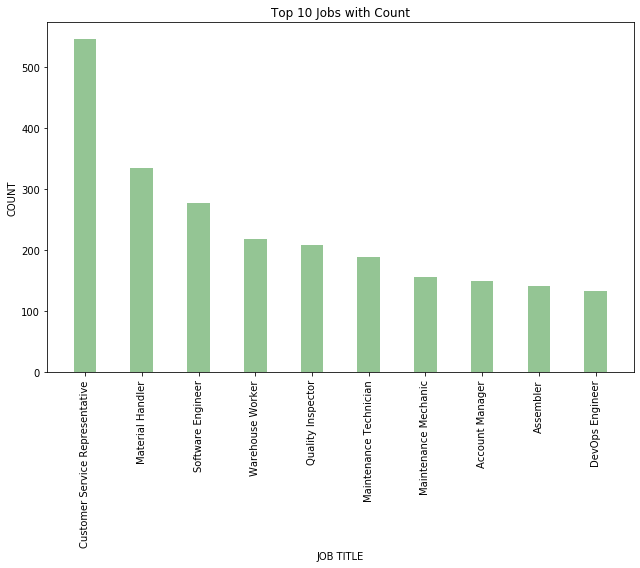

In [15]:
#bar graph for top 10 job titles
plt.figure(figsize=(9,8)) 
plt.bar(indices, frequency, color='#94c594',width=0.4) 
plt.title('Top 10 Jobs with Count') 
plt.xlabel('JOB TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='vertical') 
plt.tight_layout() 
plt.show()

In [16]:
#pre-processing for EDA Location vs top 10 job count
datavs = data
list_title_only = []
title_0 = []
title_1 = []
title_2 = []
title_3 = []
title_4 = []
title_5 = []
title_6 = []
title_7 = []
title_8 = []
title_9 = []

for i in range(len(sorted_title[:10])):
    list_title_only.append(sorted_title[:10][i][0])
    
for i in range(len(datavs)):
    if(datavs.job_title.iloc[i] == list_title_only[0]):
        title_0.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[1]):
        title_1.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[2]):
        title_2.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[3]):
        title_3.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[4]):
        title_4.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[5]):
        title_5.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[6]):
        title_6.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[7]):
        title_7.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[8]):
        title_8.append(datavs.job_location.iloc[i])
    elif(datavs.job_title.iloc[i] == list_title_only[9]):
        title_9.append(datavs.job_location.iloc[i])
        
dataCity = []

for i in range(len(title_0)):
    dataCity.append(tuple((list_title_only[0], title_0[i])))
for i in range(len(title_1)):
    dataCity.append(tuple((list_title_only[1], title_1[i])))
for i in range(len(title_2)):
    dataCity.append(tuple((list_title_only[2], title_2[i])))
for i in range(len(title_3)):
    dataCity.append(tuple((list_title_only[3], title_3[i])))
for i in range(len(title_4)):
    dataCity.append(tuple((list_title_only[4], title_4[i])))
for i in range(len(title_5)):
    dataCity.append(tuple((list_title_only[5], title_5[i])))
for i in range(len(title_6)):
    dataCity.append(tuple((list_title_only[6], title_6[i])))
for i in range(len(title_7)):
    dataCity.append(tuple((list_title_only[7], title_7[i])))
for i in range(len(title_8)):
    dataCity.append(tuple((list_title_only[8], title_8[i])))
for i in range(len(title_9)):
    dataCity.append(tuple((list_title_only[0], title_9[i])))
    
dfCity = pd.DataFrame(dataCity, columns = ['job_title', 'job_location']) 

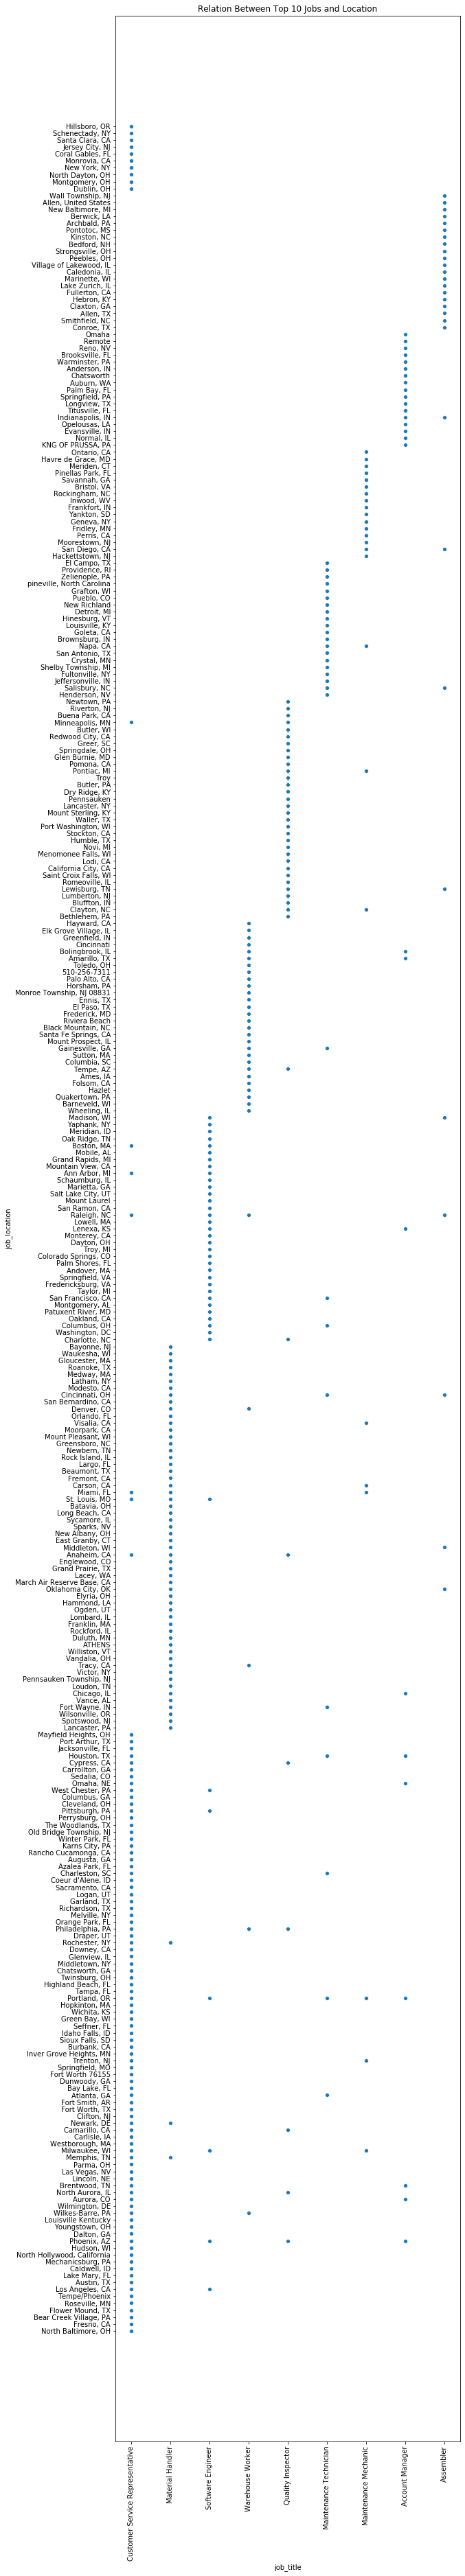

In [17]:
#Scatter-plot for Top 10 Jobs VS Job Location
plt.figure(figsize=(9,65))
plt.xticks(rotation='vertical') 
plt.title('Relation Between Top 10 Jobs and Location') 
chart = sns.scatterplot(x="job_title", y="job_location", data=dfCity)

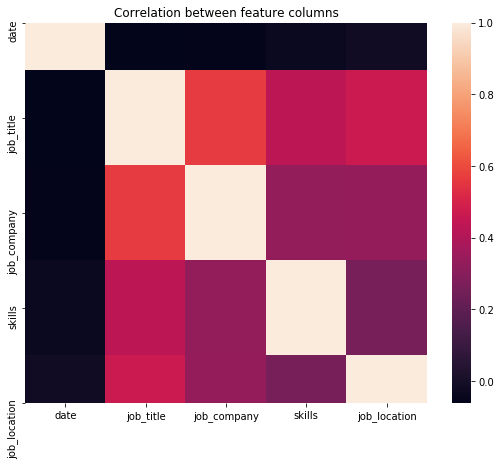

In [18]:
#Heatmap for correlation between feature columns
plt.figure(figsize=(9,7)) 
plt.title('Correlation between feature columns') 
corr = data1.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr)

In [31]:
#Pre-processing for Graph for top 20 skills with maximum and minimum average salary
#initializing dataframes
eda_sal = dataTest.copy() 
eda_sal = eda_sal[pd.notnull(eda_sal['salary'])]
df = pd.DataFrame(columns = ['skills', 'salary']) 
dataTest.head()

,date,job_title,job_company,job_location,skills,salary,job_description
0,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",Advanced Audio Coding (Aac),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
1,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",C Sharp (Programming Language),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
2,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",C++ (Programming Language),"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
3,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",Software Development Life Cycle,"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."
4,12/05/19,Senior Software Developer,Kforce Technology,"Houston, TX",.Net Framework,"\n$115,000.00 - $120,000.00 / year\n","Attending the agile ceremonies, performing so..."


In [32]:
#Pre-processing for Graph for top 20 skills with maximum and minimum average salary
#getting salary values to float type 
for i in range(len(eda_sal)):
    if("(Careerbuilder est.)" in eda_sal["salary"].iloc[i] and "$" in eda_sal["salary"].iloc[i]):
        val = eda_sal["salary"].iloc[i].split('(Careerbuilder est.)')
        strip = val[0].strip().replace(',', '')
        eda_sal["salary"].iloc[i] = float(strip[1::])
        data = [{'skills':eda_sal["skills"].iloc[i],'salary':eda_sal["salary"].iloc[i]}]
        df.loc[len(df.index)]=list(data[0].values()) 
        
    elif(" / year" in eda_sal["salary"].iloc[i] and "$" in eda_sal["salary"].iloc[i]):
        x = eda_sal["salary"].iloc[i].strip().split(' / year')
        val = x[0].replace('$', '').split(' - ')
        eda_sal["salary"].iloc[i] = float(val[1].replace(',',''))
        data = [{'skills':eda_sal["skills"].iloc[i],'salary':eda_sal["salary"].iloc[i]}]
        df.loc[len(df.index)]=list(data[0].values()) 
        
    elif(" / hour" in eda_sal["salary"].iloc[i] and "$" in eda_sal["salary"].iloc[i]):
        x = eda_sal["salary"].iloc[i].strip().split(' / hour')
        val = x[0].replace('$', '').split(' - ')
        eda_sal["salary"].iloc[i] = (float(val[1].replace(',',''))*40*52)
        data = [{'skills':eda_sal["skills"].iloc[i],'salary':eda_sal["salary"].iloc[i]}]
        df.loc[len(df.index)]=list(data[0].values()) 

In [33]:
df.head()

,skills,salary
0,Advanced Audio Coding (Aac),120000.0
1,C Sharp (Programming Language),120000.0
2,C++ (Programming Language),120000.0
3,Software Development Life Cycle,120000.0
4,.Net Framework,120000.0


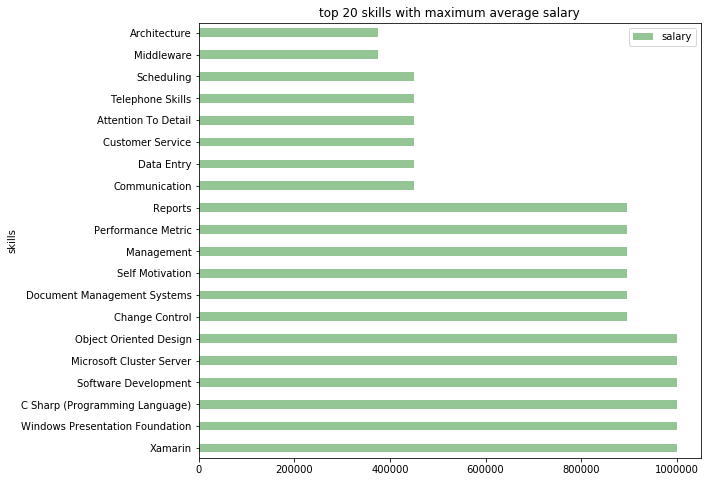

In [34]:
#Graph for top 20 skills with maximum average salary
df = df.sort_values(by='salary', ascending=False)
ax = df[:20].plot.barh(x='skills', y='salary', rot=0, color = "#94c594",width=0.4, figsize=(9,8), title = "top 20 skills with maximum average salary")

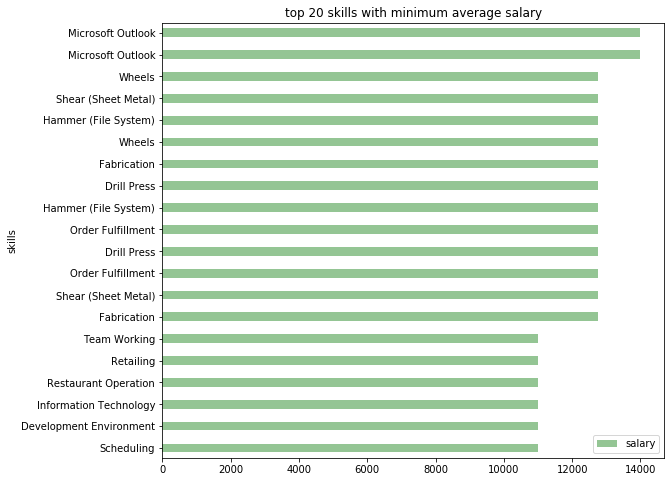

In [35]:
#Graph for top 20 skills with minimum average salary
df = df[df['salary'] >= 9999] 
df = df.sort_values(by='salary', ascending=True)
ax = df[:20].plot.barh(x='skills', y='salary', rot=0, color = "#94c594",width=0.4, figsize=(9,8), title = "top 20 skills with minimum average salary")